# Run the full pipeline to train a composer model

In [0]:
# Uncomment the line below and run this cell to get your data from github into colab (only runnable in colab, not ordinary jupyter notebook):
! git clone https://github.com/lkriener/music_generation.git && mv music_generation/* . && rm music_generation -r

Cloning into 'music_generation'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 896 (delta 124), reused 124 (delta 53), pack-reused 694
Receiving objects: 100% (896/896), 4.85 MiB | 23.42 MiB/s, done.
Resolving deltas: 100% (304/304), done.


In [0]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 11.4MB 9.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/ed/f6/fb/5d070524ecf7ba9ed201247a293c01945cfd7f840f8ef338c0
  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Successfully built pypianoroll
Failed to build pyaudio
ERROR: magenta 0.3.19 has requirement mido==1.2.6, but you'll have mido 1.2.9 which is incompatible.
  Found existing installation: mido 1.2.6
    Uninstalling mido-1.2.6:
      Successfully uninstalled mido-1.2.6
  Running setup.py install for pyaudio ... error
ERROR: Command "/usr/bin/python3 -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-3p59f94a/pyaudio/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-61mdtmj5/install-record.txt --single-version-externally-manag

In [0]:
from google.colab import drive
drive.mount('/content/drive')  # force_remount=True

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Preprocessing

In [0]:
!mkdir data/raw/bach
!cp "/content/drive/My Drive/music_datasets/bach" data/raw -r

mkdir: cannot create directory ‘data/raw/bach’: File exists
^C


In [0]:
from preprocess_songs import preprocess_songs

data_folder = './data/raw/bach'
#preprocess_songs(data_folder)

## Training Keras model

In [0]:
!cp "/content/drive/My Drive/music_datasets/bach_interim/." data/interim -r

Loading Data...
Loaded 5856 samples from 296 songs.
5856
Preparing song samples, padding songs...
Building model...
(None, 16, 96, 96)
(None, 16, 9216)
(None, 16, 2000)
(None, 16, 200)
(None, 3200)
(None, 1600)
(None, 120)
(None, 1600)
(None, 3200)
(None, 16, 200)
(None, 16, 2000)
(None, 16, 9216)
(None, 16, 96, 96)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 16, 96, 96)        0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 16, 9216)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 16, 2000)          18434000  
_________________________________________________________________
time_distributed_2 (TimeDist (None, 16, 200)           400200    
_________________________________________________________________
flatten_2 (Flatten)   

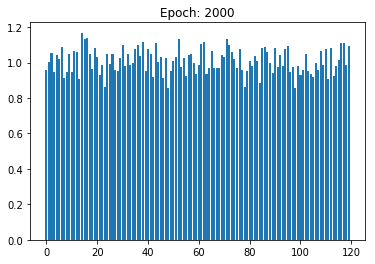

In [0]:
from src.train_keras import train as train_keras

trained_keras_model, training_loss = train_keras('data/interim/samples.npy', 'data/interim/lengths.npy', use_double_autoencoder=True, epochs_qty=2000)

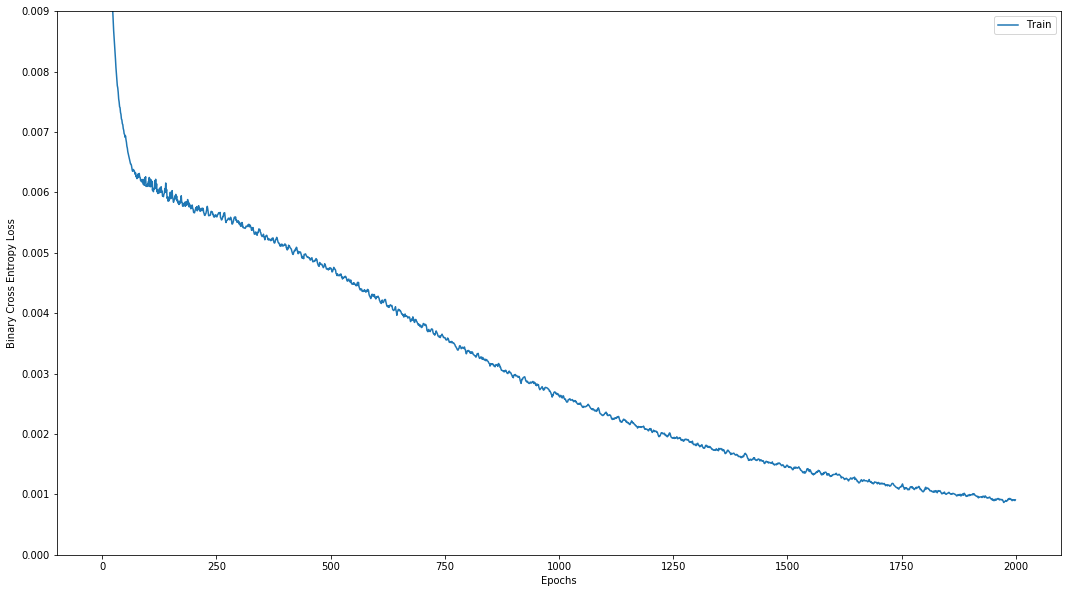

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
x = range(len(training_loss))
plt.ylim([0.0, 0.009])
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.plot(x, training_loss, label='Train')

plt.legend()

In [0]:
!mv results/history results/history-keras

## Train pytorch model

In [0]:
!cp "/content/drive/My Drive/music_datasets/bach_interim/." data/interim -r

In [0]:
from src.train_pytorch import train as train_pytorch

train_pytorch('data/interim/samples.npy', 'data/interim/lengths.npy', 2000)

TypeError: ignored

## Test model and move results to permanent storage

In [0]:
from src.composer import play

play(framework='keras', sub_dir_name='e1/')

In [0]:
!zip -r results.zip results/

  adding: results/ (stored 0%)
  adding: results/feedforward_net_track.csv (deflated 83%)
  adding: results/RNN_harmonization_overfit.mid (deflated 59%)
  adding: results/retrained_feedforward_snapshot.mid (deflated 64%)
  adding: results/RNN_single_overfit.mid (deflated 21%)
  adding: results/feedforward_net_track_intervals.mp3 (deflated 5%)
  adding: results/loaded_feedforward_generating.csv (deflated 79%)
  adding: results/feedforward_net_track_intervals.mid (deflated 65%)
  adding: results/RNN_single_early.mid (deflated 15%)
  adding: results/feedforward_net_track_intervals.csv (deflated 80%)
  adding: results/retrained_feedforward_untrained.csv (deflated 80%)
  adding: results/retrained_feedforward_untrained.pth (deflated 11%)
  adding: results/.gitkeep (stored 0%)
  adding: results/model.png (deflated 17%)
  adding: results/feedforward_net_track_intervals_snapshot.csv (deflated 80%)
  adding: results/RNN_harmonization_random.mid (deflated 55%)
  adding: results/03_predict_2_from_

In [0]:
!cp results.zip "drive/My Drive/music_results" -rv

'results.zip' -> 'drive/My Drive/music_results/results.zip'


In [0]:
!cp results/history/e2000 "drive/My Drive/music_results/results/history/" -r

In [0]:
!cp results/history/model.h5 "drive/My Drive/music_results/results/history" -v

cp: cannot stat 'results/history/model.h5': No such file or directory


In [0]:
!cp results/history/encoder.pkl "drive/My Drive/music_results/results/history" -v

'results/history/encoder.pkl' -> 'drive/My Drive/music_results/results/history/encoder.pkl'


In [0]:
!cp results/history/decoder.pkl "drive/My Drive/music_results/results/history" -v

'results/history/decoder.pkl' -> 'drive/My Drive/music_results/results/history/decoder.pkl'


In [0]:
!cp results "drive/My Drive/music_" -r